## HT9 - Proyecto 2. Entrega 7
### RNA
Diego Duarte 22075 - José Marchena 22398

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import rna

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Importar Datos
house_prices=pd.read_csv("train.csv")

In [2]:
house_prices = rna.drop_many_nulls(house_prices)
house_prices = rna.trans_categorical(house_prices)

c:\Users\diego\OneDrive\Escritorio\2025\Semestre VII\Mineria\RNA\rna.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = km.fit_predict(X_pca)


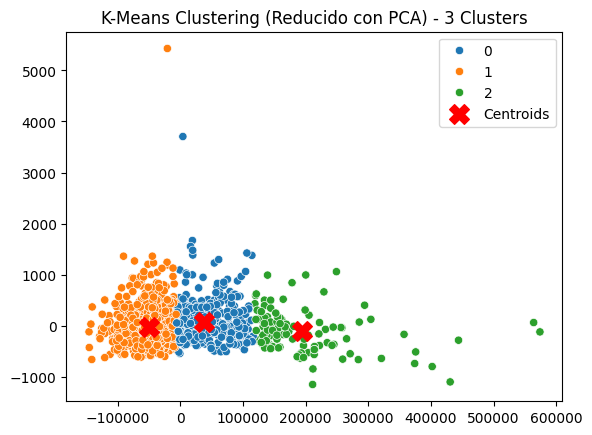

In [3]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_val_predict


cluster_set = house_prices[['GrLivArea', 'SalePrice','1stFlrSF','GarageArea']]
cluster_set.dropna()

cluster_set = rna.breif_clustering(cluster_set, 3)

In [4]:
tem = house_prices[house_prices.columns]
object_cols = tem.select_dtypes(include=['object']).columns
fuzzy_hp = pd.get_dummies(tem, columns=object_cols, drop_first=True)
fuzzy_hp['SpThird'] = cluster_set['Cluster']
fuzzy_hp.pop('SalePrice')
fuzzy_hp.groupby('SpThird').size()

SpThird
0    518
1    826
2    116
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_houses = scaler.fit_transform(house_prices)

# Añadir la columna de clusters al DataFrame original
house_prices['price_group'] = cluster_set['Cluster']

# Reemplazar los valores numéricos por etiquetas de texto
label_map = {
    0: 'medio',
    1: 'barato',
    2: 'caro'
}
house_prices['price_group'] = house_prices['price_group'].map(label_map)

### MODELO 1

In [6]:
from sklearn.compose import make_column_selector as selector 


target = house_prices['price_group']
features = house_prices.drop(columns='price_group')

selector_numericas = selector(dtype_exclude=object) #Seleccionamos todas las variables que no son Object
selector_categoricas = selector(dtype_include=object) #Seleccionamos todas las varibles de tipo object
#Seleccionamos las columnas que cumplen con los selectores pasándole los datos
numericas = selector_numericas(features)
categoricas = selector_categoricas(features)


In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier

preprocesador_categorico = OneHotEncoder(handle_unknown="ignore")
preprocesador_numerico = StandardScaler()

preprocesador = ColumnTransformer([
    ('one_hot_encoder',preprocesador_categorico,categoricas),
    ('standard_scaler',preprocesador_numerico, numericas)
])

In [8]:
modelo1 = make_pipeline(preprocesador,MLPClassifier(activation="tanh",verbose=True,hidden_layer_sizes=(5,3)))
modelo1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'MSZoning',
                                                   'LotArea', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'TotalBsmtSF', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 3),
                               verbose=True))])

In [9]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    features, target, train_size=0.7,test_size=0.3)
print("Shape train",data_train.shape)
print("Shape test",data_test.shape)
features.isnull().sum()

Shape train (1021, 56)
Shape test (438, 56)


MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
MoSold           0
YrSold      

In [10]:
modelo1.fit(data_train,target_train)

Iteration 1, loss = 1.75466651
Iteration 2, loss = 1.70351138
Iteration 3, loss = 1.65249167
Iteration 4, loss = 1.60386602
Iteration 5, loss = 1.55342658
Iteration 6, loss = 1.50181549
Iteration 7, loss = 1.45268903
Iteration 8, loss = 1.40316120
Iteration 9, loss = 1.35406284
Iteration 10, loss = 1.30610371
Iteration 11, loss = 1.25982224
Iteration 12, loss = 1.21378358
Iteration 13, loss = 1.17065333
Iteration 14, loss = 1.12903501
Iteration 15, loss = 1.08903636
Iteration 16, loss = 1.05067221
Iteration 17, loss = 1.01511899
Iteration 18, loss = 0.97989148
Iteration 19, loss = 0.94638593
Iteration 20, loss = 0.91459987
Iteration 21, loss = 0.88458427
Iteration 22, loss = 0.85594930
Iteration 23, loss = 0.82809369
Iteration 24, loss = 0.80139961
Iteration 25, loss = 0.77688628
Iteration 26, loss = 0.75337757
Iteration 27, loss = 0.73178262
Iteration 28, loss = 0.71185243
Iteration 29, loss = 0.69305474
Iteration 30, loss = 0.67504718
Iteration 31, loss = 0.65840699
Iteration 32, los

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'MSZoning',
                                                   'LotArea', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'TotalBsmtSF', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 3),
                               verbose=True))])

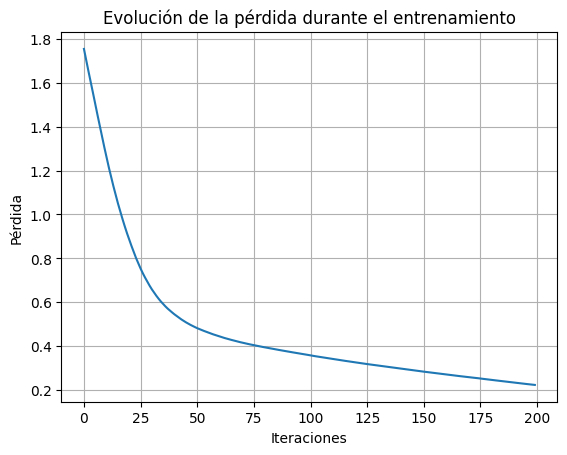

In [11]:
mlp = modelo1.named_steps['mlpclassifier']  # accedemos al estimador final

plt.plot(mlp.loss_curve_)
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.grid()
plt.show()

In [12]:
pred1 = modelo1.predict(data_test)
pred1[:5]

array(['medio', 'medio', 'medio', 'medio', 'barato'], dtype='<U6')

Precisión del modelo: 0.84
              precision    recall  f1-score   support

      barato       0.95      0.93      0.94       245
        caro       0.00      0.00      0.00        40
       medio       0.71      0.93      0.81       153

    accuracy                           0.84       438
   macro avg       0.56      0.62      0.58       438
weighted avg       0.78      0.84      0.81       438



c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

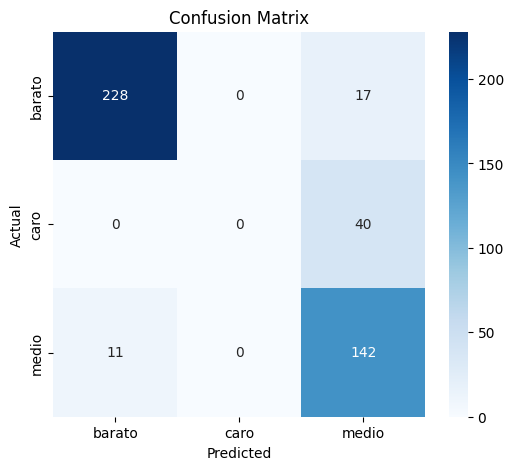

In [13]:
rna.metrics_and_cm(pred1, target_test)

### MODELO 2

In [14]:
modelo2 = make_pipeline(preprocesador,MLPClassifier(activation="relu",verbose=True,hidden_layer_sizes=(50,15), random_state=42))
modelo2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'MSZoning',
                                                   'LotArea', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'TotalBsmtSF', ...])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(50, 15), random_state=42,
                               verbose=True))])

In [15]:
modelo2.fit(data_train,target_train)

Iteration 1, loss = 1.01123527
Iteration 2, loss = 0.85607020
Iteration 3, loss = 0.74749469
Iteration 4, loss = 0.66555610
Iteration 5, loss = 0.59994407
Iteration 6, loss = 0.54669077
Iteration 7, loss = 0.50273691
Iteration 8, loss = 0.46787877
Iteration 9, loss = 0.43648669
Iteration 10, loss = 0.41066885
Iteration 11, loss = 0.38867738
Iteration 12, loss = 0.36992804
Iteration 13, loss = 0.35168944
Iteration 14, loss = 0.33653323
Iteration 15, loss = 0.32236372
Iteration 16, loss = 0.31014676
Iteration 17, loss = 0.29728303
Iteration 18, loss = 0.28627730
Iteration 19, loss = 0.27628201
Iteration 20, loss = 0.26584589
Iteration 21, loss = 0.25599035
Iteration 22, loss = 0.24699679
Iteration 23, loss = 0.23869434
Iteration 24, loss = 0.23103554
Iteration 25, loss = 0.22276511
Iteration 26, loss = 0.21496977
Iteration 27, loss = 0.20797491
Iteration 28, loss = 0.20134674
Iteration 29, loss = 0.19524475
Iteration 30, loss = 0.18814229
Iteration 31, loss = 0.18247424
Iteration 32, los

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'MSZoning',
                                                   'LotArea', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'TotalBsmtSF', ...])])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(50, 15), random_state=42,
                               verbose=True))])

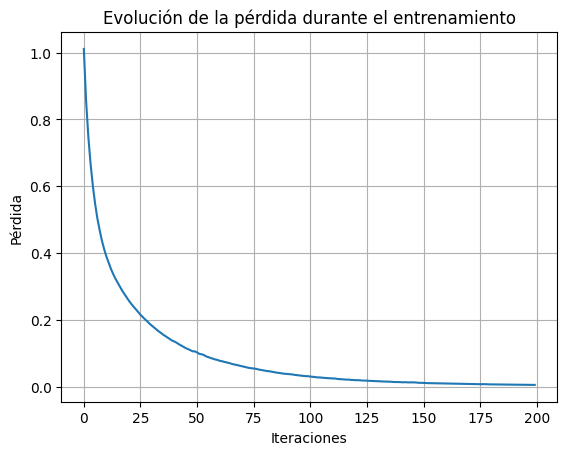

In [16]:
mlp2 = modelo2.named_steps['mlpclassifier']  # accedemos al estimador final

plt.plot(mlp2.loss_curve_)
plt.title('Evolución de la pérdida durante el entrenamiento')
plt.xlabel('Iteraciones')
plt.ylabel('Pérdida')
plt.grid()
plt.show()

In [17]:
pred2 = modelo2.predict(data_test)
pred2[:5]

array(['medio', 'caro', 'medio', 'medio', 'barato'], dtype='<U6')

Precisión del modelo: 0.89
              precision    recall  f1-score   support

      barato       0.93      0.92      0.93       245
        caro       0.86      0.78      0.82        40
       medio       0.82      0.86      0.84       153

    accuracy                           0.89       438
   macro avg       0.87      0.85      0.86       438
weighted avg       0.89      0.89      0.89       438



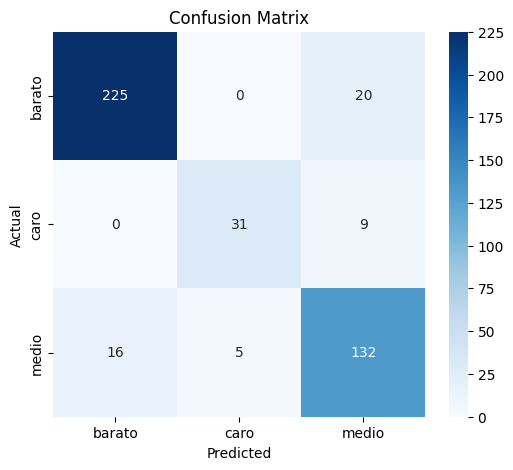

In [18]:
rna.metrics_and_cm(pred2, target_test)

### MODELO 1 (Tuneado)

In [23]:
modelo1B = make_pipeline(preprocesador,MLPClassifier(activation="tanh",verbose=True,hidden_layer_sizes=(15,10), alpha=0.01))
modelo1B

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'MSZoning',
                                                   'LotArea', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'TotalBsmtSF', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=0.01,
                               hidden_layer_sizes=(15, 10), verbose=True))])

In [24]:
modelo1B.fit(data_train,target_train)

Iteration 1, loss = 1.09119119
Iteration 2, loss = 0.96394811
Iteration 3, loss = 0.86701341
Iteration 4, loss = 0.79041379
Iteration 5, loss = 0.73265635
Iteration 6, loss = 0.68743270
Iteration 7, loss = 0.65137167
Iteration 8, loss = 0.62027384
Iteration 9, loss = 0.59407830
Iteration 10, loss = 0.57221732
Iteration 11, loss = 0.55312845
Iteration 12, loss = 0.53672577
Iteration 13, loss = 0.52201689
Iteration 14, loss = 0.50870557
Iteration 15, loss = 0.49637236
Iteration 16, loss = 0.48533346
Iteration 17, loss = 0.47527359
Iteration 18, loss = 0.46562184
Iteration 19, loss = 0.45662508
Iteration 20, loss = 0.44798565
Iteration 21, loss = 0.43962506
Iteration 22, loss = 0.43155110
Iteration 23, loss = 0.42367857
Iteration 24, loss = 0.41637115
Iteration 25, loss = 0.40889169
Iteration 26, loss = 0.40189933
Iteration 27, loss = 0.39540287
Iteration 28, loss = 0.38893845
Iteration 29, loss = 0.38289817
Iteration 30, loss = 0.37672578
Iteration 31, loss = 0.37081561
Iteration 32, los

c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['MSSubClass', 'MSZoning',
                                                   'LotArea', 'Street',
                                                   'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig',
                                                   'LandSlope', 'Neighborhood',
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2',
                                                   'TotalBsmtSF', ...])])),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=0.01,
                               hidden_layer_sizes=(15, 10), verbose=True))])

In [25]:
pred1B = modelo2.predict(data_test)
pred1B[:5]

array(['medio', 'caro', 'medio', 'medio', 'barato'], dtype='<U6')

Precisión del modelo: 0.89
              precision    recall  f1-score   support

      barato       0.93      0.92      0.93       245
        caro       0.86      0.78      0.82        40
       medio       0.82      0.86      0.84       153

    accuracy                           0.89       438
   macro avg       0.87      0.85      0.86       438
weighted avg       0.89      0.89      0.89       438



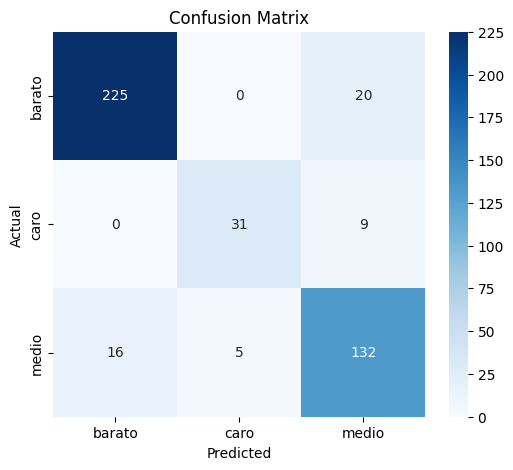

In [26]:
rna.metrics_and_cm(pred1B, target_test)